#After what I thought would be the last iteration of the dataset, I started a new Jupyter Notebook to have a well organized final submission. I output some visuals to review what I have.

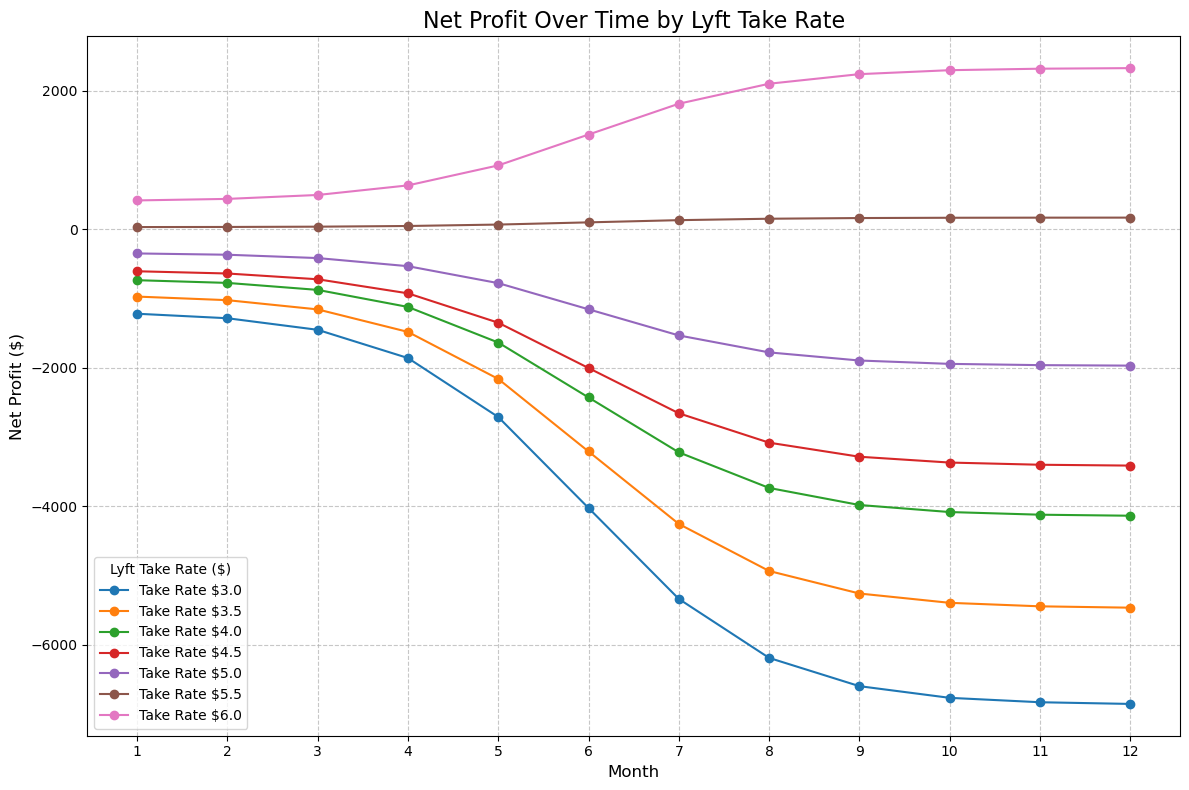

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_file_path.csv' with the actual path to your dataset)

data = pd.read_csv('final_lyft_analysis_corrected.csv')

# Group data by Month and Lyft Take Rate and calculate the mean Net Profit for each group
grouped_data = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Profit ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_data = grouped_data.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Profit ($)')

# Plotting Net Profit over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linestyle='-', label=f'Take Rate ${column}')

plt.title('Net Profit Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_data.index)
plt.tight_layout()
plt.show()


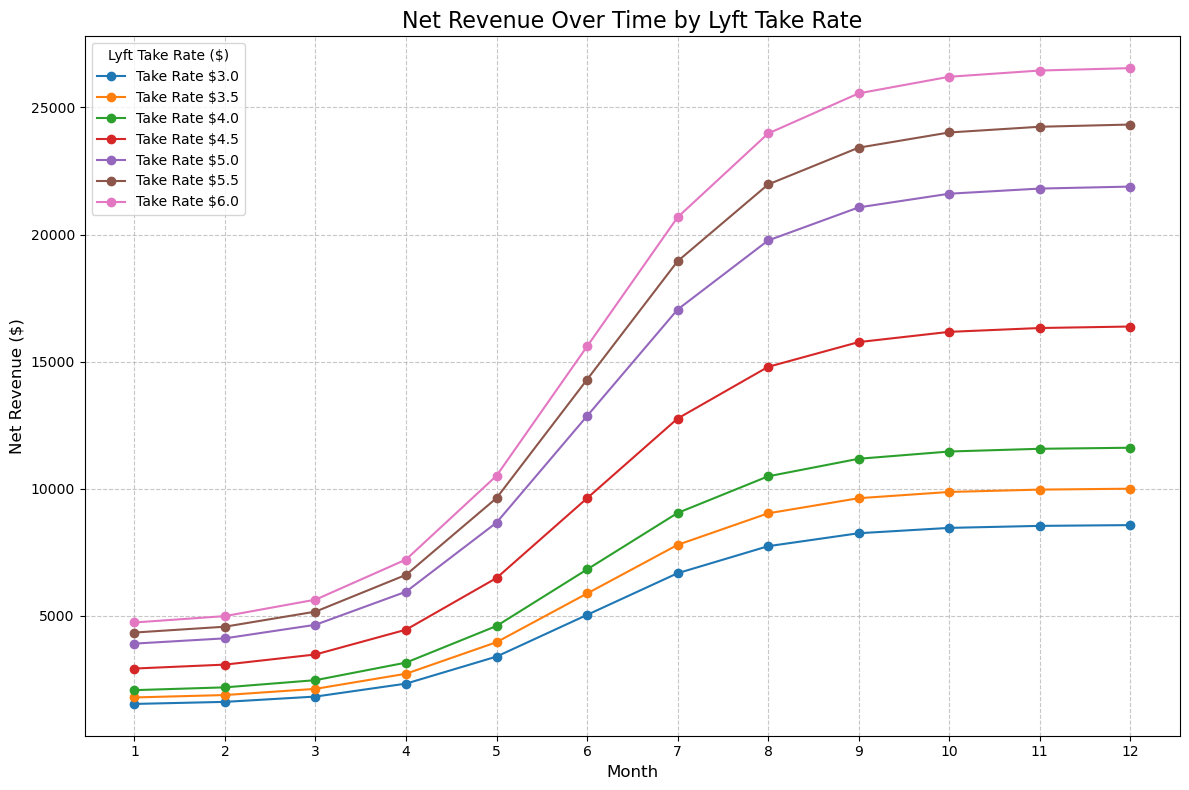

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'final_lyft_analysis_corrected.csv' with your actual file path)
data = pd.read_csv('final_lyft_analysis_corrected.csv')

# Group data by Month and Lyft Take Rate and calculate the mean Net Revenue for each group
grouped_data = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Revenue ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_data = grouped_data.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Revenue ($)')

# Plotting Net Revenue over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linestyle='-', label=f'Take Rate ${column}')

plt.title('Net Revenue Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Revenue ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_data.index)
plt.tight_layout()
plt.show()


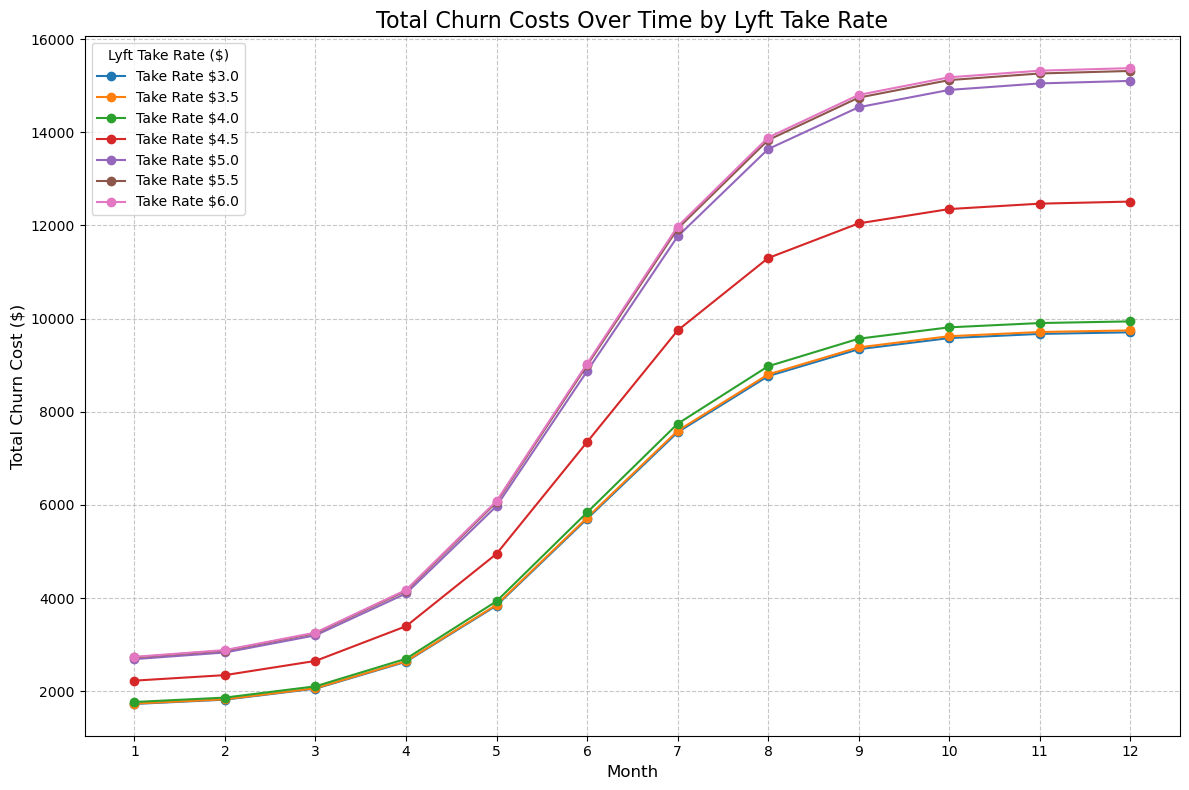

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'final_lyft_analysis_corrected.csv' with your actual file path)
data = pd.read_csv('final_lyft_analysis_corrected.csv')

# Group data by Month and Lyft Take Rate and calculate the mean Total Churn Cost for each group
grouped_data = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Total Churn Cost ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_data = grouped_data.pivot(index='Month', columns='Lyft Take Rate ($)', values='Total Churn Cost ($)')

# Plotting Total Churn Costs over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linestyle='-', label=f'Take Rate ${column}')

plt.title('Total Churn Costs Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Churn Cost ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_data.index)
plt.tight_layout()
plt.show()


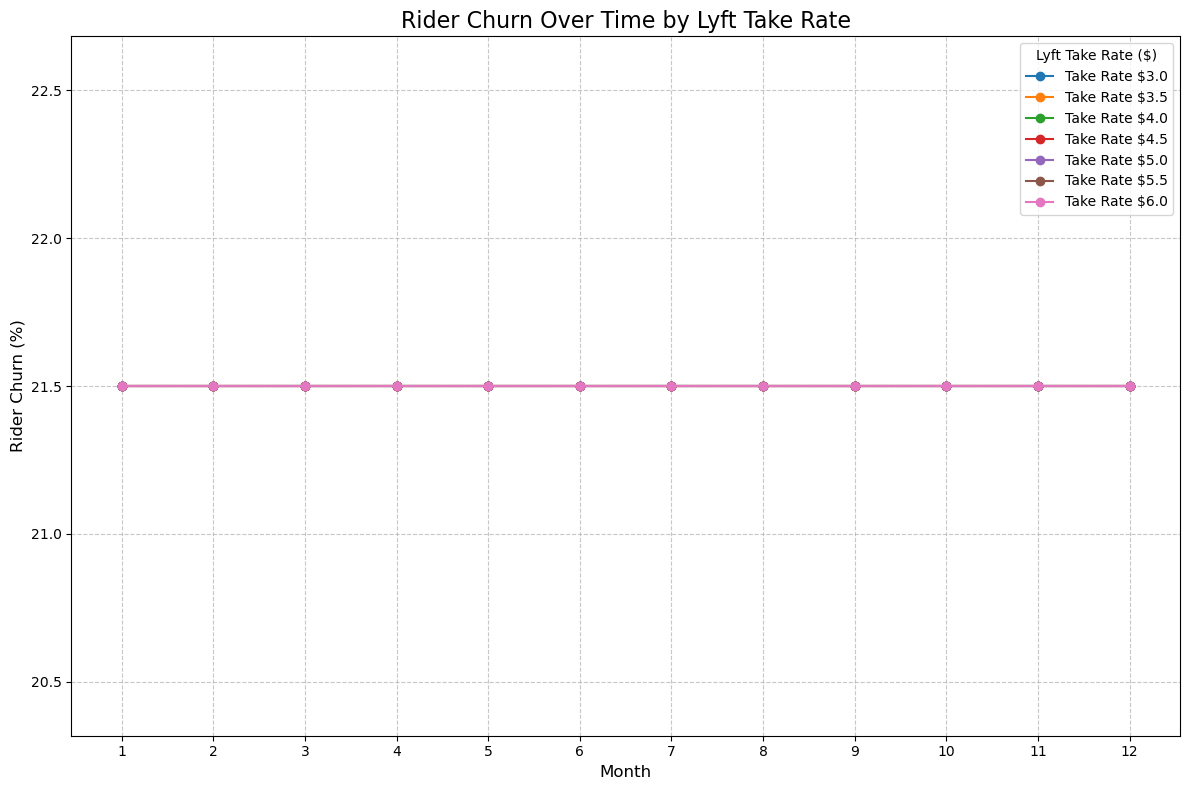

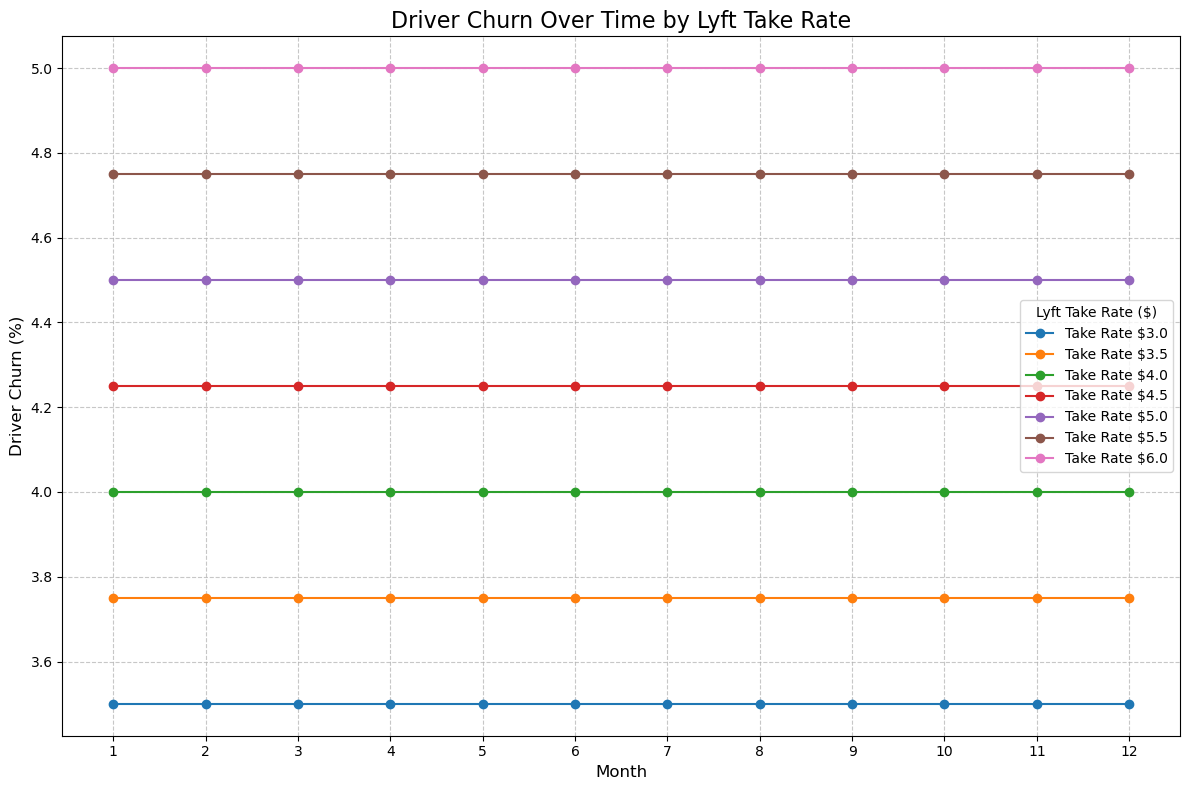

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'final_lyft_analysis_corrected.csv' with your actual file path)
data = pd.read_csv('final_lyft_analysis_corrected.csv')

# Group data by Month and Lyft Take Rate and calculate the mean Rider and Driver Churn for each group
grouped_churn = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)[
    ['Rider Churn (%)', 'Driver Churn (%)']
].mean()

# Pivot data for Rider Churn
pivot_rider_churn = grouped_churn.pivot(index='Month', columns='Lyft Take Rate ($)', values='Rider Churn (%)')

# Pivot data for Driver Churn
pivot_driver_churn = grouped_churn.pivot(index='Month', columns='Lyft Take Rate ($)', values='Driver Churn (%)')

# Plotting Rider Churn over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_rider_churn.columns:
    plt.plot(pivot_rider_churn.index, pivot_rider_churn[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Rider Churn Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rider Churn (%)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_rider_churn.index)
plt.tight_layout()
plt.show()

# Plotting Driver Churn over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_driver_churn.columns:
    plt.plot(pivot_driver_churn.index, pivot_driver_churn[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Driver Churn Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Driver Churn (%)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_driver_churn.index)
plt.tight_layout()
plt.show()



#After giving myself sometime to think about the scenario, careful review of the dataset, and review of the given values and market research, I realized I needed to make some changes to fix and improve the dataset.

In [6]:
# Assuming Akron-based total rideshare demand as "total_rides"
# Adjusted for Toledo's passenger ratio (Toledo passengers / Akron passengers)
akron_to_toledo_ratio = 0.8  # Example scaling factor
data["Completed Rides"] *= akron_to_toledo_ratio


#I reviewed the market reserach and noticed a size difference in the "similar airport" so I added a ratio, which actually lowered the number of completed rides per day. 

In [7]:
# Recalculate churn costs using CAC
data["Rider Churn Cost ($)"] = (
    (data["Rider Churn (%)"] / 100) * 15 * data["New Completed Rides"]
)
data["Driver Churn Cost ($)"] = (
    (data["Driver Churn (%)"] / 100) * 500 * data["New Completed Rides"] / 100
)
data["Total Churn Cost ($)"] = (
    data["Rider Churn Cost ($)"] + data["Driver Churn Cost ($)"]
)


In [8]:
# Update Net Revenue and Net Profit
data["Net Revenue ($)"] = (
    data["New Completed Rides"] * data["Lyft Take Rate ($)"]
)
data["Net Profit ($)"] = (
    data["Net Revenue ($)"]
    - data["Total Churn Cost ($)"]
    - (data["New Completed Rides"] * 2)  # Operational cost
)

# Save the updated dataset
data.to_csv("updated_lyft_analysis.csv", index=False)


#Previously, I had included an assumption that stated a fixed operational cost inlcuded in the calculation for net profit. I decided against this to get a better understand of the specific operational costs and impact from  CAC and churn (the costs we have data on). 

In [9]:
print(data)

      Month  Lyft Take Rate ($)  Driver Payout ($)  Driver Churn (%)  \
0         1                 3.0               22.0               3.5   
1         1                 3.0               22.0               3.5   
2         1                 3.0               22.0               3.5   
3         1                 3.0               22.0               3.5   
4         1                 3.0               22.0               3.5   
...     ...                 ...                ...               ...   
2851     12                 6.0               19.0               5.0   
2852     12                 6.0               19.0               5.0   
2853     12                 6.0               19.0               5.0   
2854     12                 6.0               19.0               5.0   
2855     12                 6.0               19.0               5.0   

      Rider Churn (%)  Match Rate (%)  Completed Rides  Rider Churn Cost ($)  \
0           33.000000       60.001003            678.4 

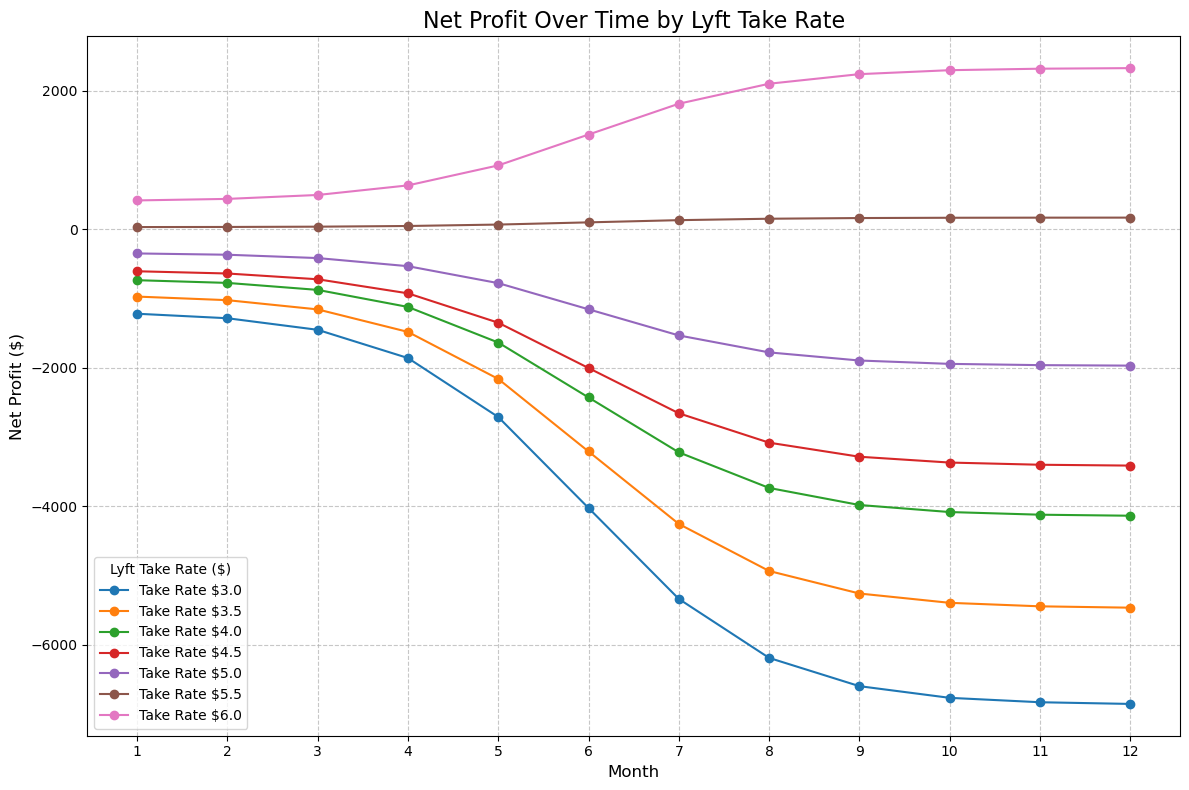

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate and calculate the mean Net Profit for each group
grouped_net_profit = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Profit ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_net_profit = grouped_net_profit.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Profit ($)')

# Plotting Net Profit over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_net_profit.columns:
    plt.plot(pivot_net_profit.index, pivot_net_profit[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Net Profit Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_net_profit.index)
plt.tight_layout()
plt.show()


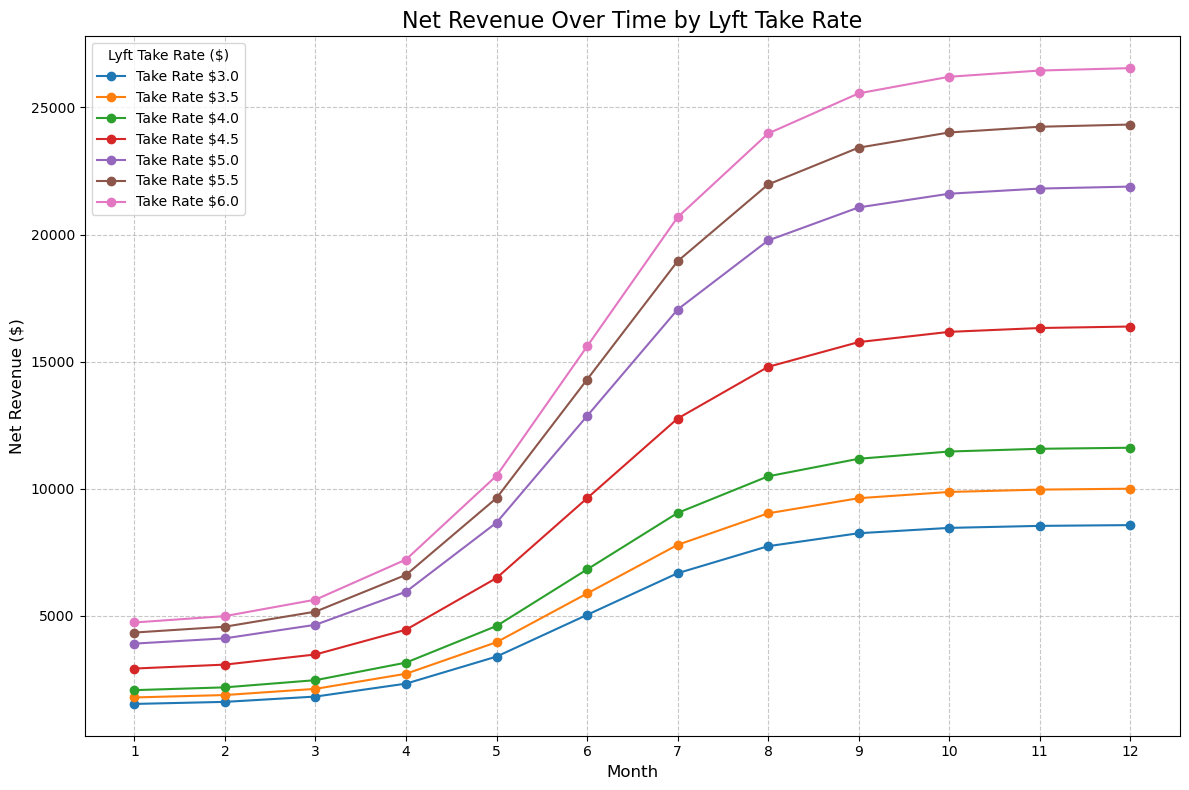

In [11]:
# Group data by Month and Lyft Take Rate and calculate the mean Net Revenue for each group
grouped_net_revenue = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Revenue ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_net_revenue = grouped_net_revenue.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Revenue ($)')

# Plotting Net Revenue over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_net_revenue.columns:
    plt.plot(pivot_net_revenue.index, pivot_net_revenue[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Net Revenue Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Revenue ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_net_revenue.index)
plt.tight_layout()
plt.show()


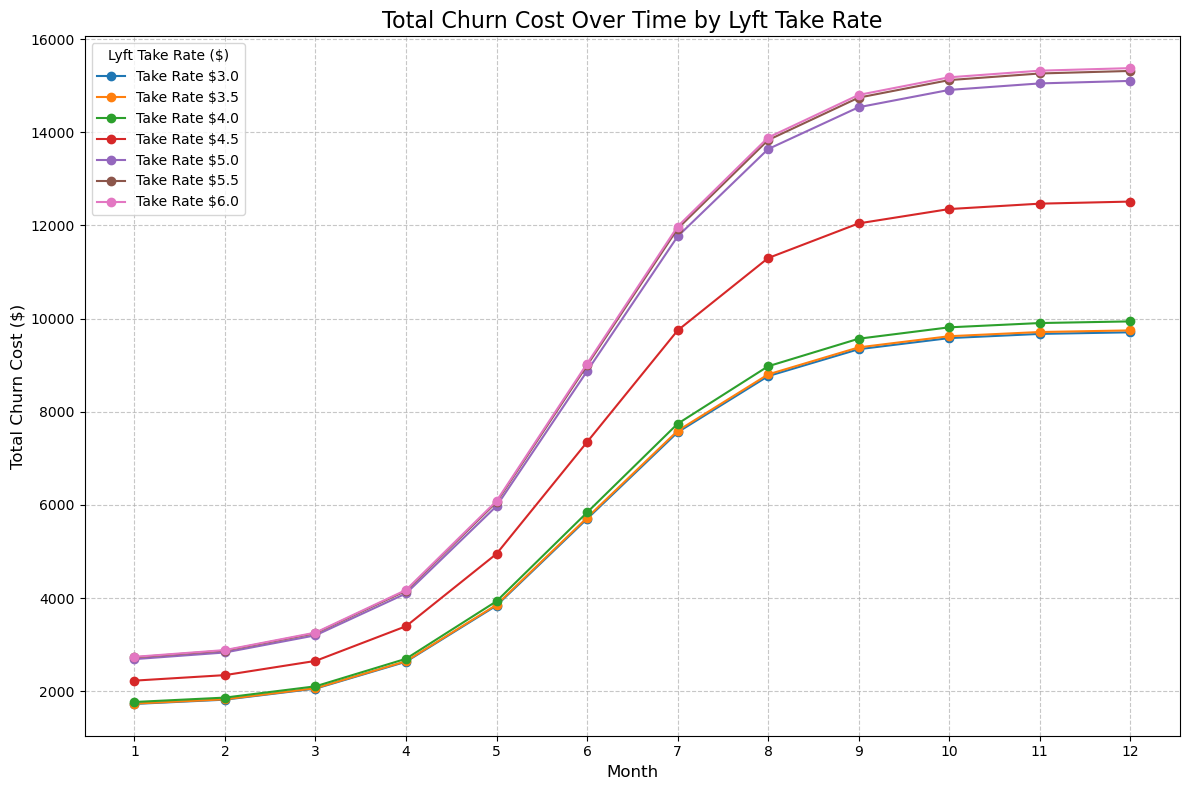

In [12]:
# Group data by Month and Lyft Take Rate and calculate the mean Total Churn Cost for each group
grouped_churn_cost = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Total Churn Cost ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_churn_cost = grouped_churn_cost.pivot(index='Month', columns='Lyft Take Rate ($)', values='Total Churn Cost ($)')

# Plotting Total Churn Cost over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_churn_cost.columns:
    plt.plot(pivot_churn_cost.index, pivot_churn_cost[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Total Churn Cost Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Churn Cost ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_churn_cost.index)
plt.tight_layout()
plt.show()


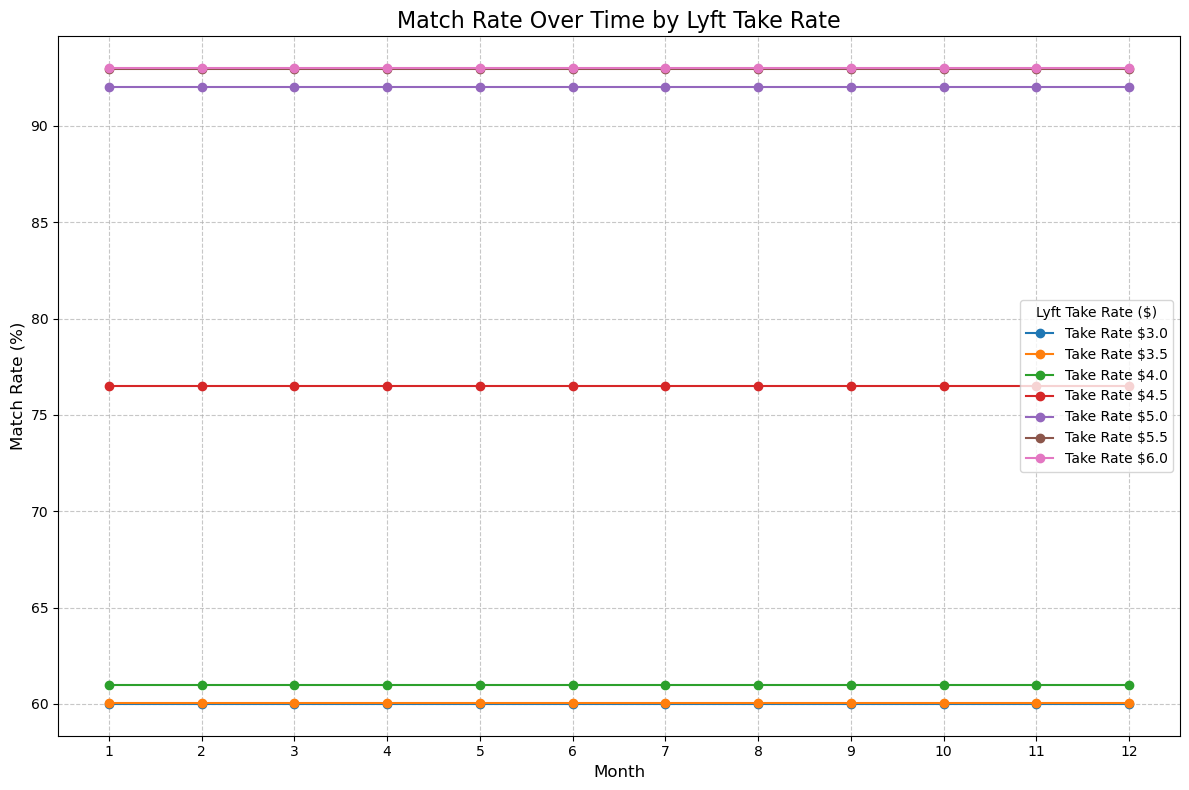

In [13]:
# Group data by Month and Lyft Take Rate and calculate the mean Match Rate for each group
grouped_match_rate = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Match Rate (%)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_match_rate = grouped_match_rate.pivot(index='Month', columns='Lyft Take Rate ($)', values='Match Rate (%)')

# Plotting Match Rate over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_match_rate.columns:
    plt.plot(pivot_match_rate.index, pivot_match_rate[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Match Rate Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Match Rate (%)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_match_rate.index)
plt.tight_layout()
plt.show()


In [14]:
data["Net Profit ($)"] = data["Net Revenue ($)"] - data["Total Churn Cost ($)"]


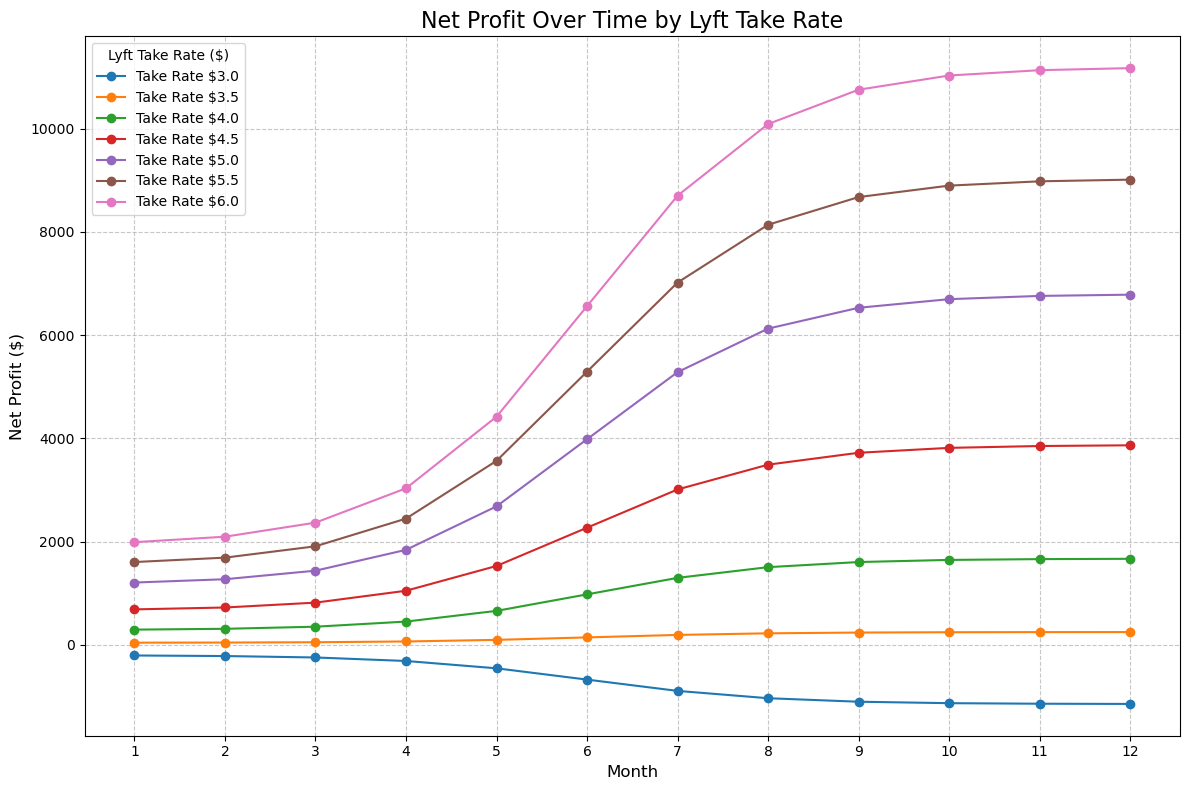

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate and calculate the mean Net Profit for each group
grouped_net_profit = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Profit ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_net_profit = grouped_net_profit.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Profit ($)')

# Plotting Net Profit over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_net_profit.columns:
    plt.plot(pivot_net_profit.index, pivot_net_profit[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Net Profit Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_net_profit.index)
plt.tight_layout()
plt.show()


In [16]:
print(data)

      Month  Lyft Take Rate ($)  Driver Payout ($)  Driver Churn (%)  \
0         1                 3.0               22.0               3.5   
1         1                 3.0               22.0               3.5   
2         1                 3.0               22.0               3.5   
3         1                 3.0               22.0               3.5   
4         1                 3.0               22.0               3.5   
...     ...                 ...                ...               ...   
2851     12                 6.0               19.0               5.0   
2852     12                 6.0               19.0               5.0   
2853     12                 6.0               19.0               5.0   
2854     12                 6.0               19.0               5.0   
2855     12                 6.0               19.0               5.0   

      Rider Churn (%)  Match Rate (%)  Completed Rides  Rider Churn Cost ($)  \
0           33.000000       60.001003            678.4 

#I realize the provided relationship for rider churn has a simple equation I can use.

In [17]:
# Adjust Rider Churn Calculation
def calculate_rider_churn(match_rate):
    failure_probability = 1 - (match_rate / 100)  # Probability of a failed match
    churn = (failure_probability * 33) + ((1 - failure_probability) * 10)  # Weighted churn rate
    return churn

# Apply the new rider churn calculation
data['Rider Churn (%)'] = data['Match Rate (%)'].apply(calculate_rider_churn)

# Recalculate Rider Churn Costs
data['Rider Churn Cost ($)'] = (
    (data['Rider Churn (%)'] / 100) * 15 * data['New Completed Rides']
)


In [18]:
print(data)

      Month  Lyft Take Rate ($)  Driver Payout ($)  Driver Churn (%)  \
0         1                 3.0               22.0               3.5   
1         1                 3.0               22.0               3.5   
2         1                 3.0               22.0               3.5   
3         1                 3.0               22.0               3.5   
4         1                 3.0               22.0               3.5   
...     ...                 ...                ...               ...   
2851     12                 6.0               19.0               5.0   
2852     12                 6.0               19.0               5.0   
2853     12                 6.0               19.0               5.0   
2854     12                 6.0               19.0               5.0   
2855     12                 6.0               19.0               5.0   

      Rider Churn (%)  Match Rate (%)  Completed Rides  Rider Churn Cost ($)  \
0           19.199769       60.001003            678.4 

In [19]:
import numpy as np
from scipy.optimize import minimize

# Define the logistic function
def logistic(take_rate, k, t_0=4.5):
    return 60 + (33 / (1 + np.exp(-k * (take_rate - t_0))))

# Loss function to optimize k
def loss_function(k):
    # Minimize the difference between actual match rates and logistic outputs at $3 and $6
    error_at_3 = (logistic(3, k) - 93) ** 2
    error_at_6 = (logistic(6, k) - 60) ** 2
    return error_at_3 + error_at_6

# Optimize k
result = minimize(loss_function, x0=1.0)  # Initial guess for k
k_optimized = result.x[0]

# Recalculate Match Rates with optimized k
data['Match Rate (%)'] = logistic(data['Lyft Take Rate ($)'], k_optimized)

# Ensure match rates are clipped between 60 and 93
data['Match Rate (%)'] = data['Match Rate (%)'].clip(lower=60, upper=93)

# Update New Completed Rides based on recalculated match rates
data['New Completed Rides'] = (
    data['Completed Rides'] * (data['Match Rate (%)'] / 100)
)

# Recalculate Rider Churn Costs after match rate adjustments
data['Rider Churn Cost ($)'] = (
    (data['Rider Churn (%)'] / 100) * 15 * data['New Completed Rides']
)


In [23]:
print(data)

      Month  Lyft Take Rate ($)  Driver Payout ($)  Driver Churn (%)  \
0         1                 3.0               22.0               3.5   
1         1                 3.0               22.0               3.5   
2         1                 3.0               22.0               3.5   
3         1                 3.0               22.0               3.5   
4         1                 3.0               22.0               3.5   
...     ...                 ...                ...               ...   
2851     12                 6.0               19.0               5.0   
2852     12                 6.0               19.0               5.0   
2853     12                 6.0               19.0               5.0   
2854     12                 6.0               19.0               5.0   
2855     12                 6.0               19.0               5.0   

      Rider Churn (%)  Match Rate (%)  Completed Rides  Rider Churn Cost ($)  \
0           19.199769       92.998869            678.4 

In [24]:
with pd.option_context('display.max_rows', None):  # Show all rows
    print(data)

      Month  Lyft Take Rate ($)  Driver Payout ($)  Driver Churn (%)  \
0         1                 3.0               22.0              3.50   
1         1                 3.0               22.0              3.50   
2         1                 3.0               22.0              3.50   
3         1                 3.0               22.0              3.50   
4         1                 3.0               22.0              3.50   
5         1                 3.0               22.0              3.50   
6         1                 3.0               22.0              3.50   
7         1                 3.0               22.0              3.50   
8         1                 3.0               22.0              3.50   
9         1                 3.0               22.0              3.50   
10        1                 3.0               22.0              3.50   
11        1                 3.0               22.0              3.50   
12        1                 3.0               22.0              

#I re-read the prompt with the provided data and realized my match rate was inversely correlated the lyft take! so I had to change the direction of it. 

In [27]:
# Recalculate Rider Churn (%) based on updated Match Rate (%)
def calculate_rider_churn(match_rate):
    failure_probability = 1 - (match_rate / 100)  # Probability of a failed match
    churn = (failure_probability * 33) + ((1 - failure_probability) * 10)  # Weighted churn rate
    return churn

# Apply the updated calculation
data['Rider Churn (%)'] = data['Match Rate (%)'].apply(calculate_rider_churn)

# Recalculate Rider Churn Costs with corrected churn rates
data['Rider Churn Cost ($)'] = (
    (data['Rider Churn (%)'] / 100) * 15 * data['New Completed Rides']
)


#I then realized using a logistical regression for rider churn was a false assumption to make given the info in the prompt, so I updated the equation to better fit the given: "Churn is interesting: riders who don’t experience a “failed to find driver” event churn at 10% monthly, but riders who experience one or more “failed to find driver” events churn at 33% monthly"

In [28]:
with pd.option_context('display.max_rows', None):  # Show all rows
    print(data)

      Month  Lyft Take Rate ($)  Driver Payout ($)  Driver Churn (%)  \
0         1                 3.0               22.0              3.50   
1         1                 3.0               22.0              3.50   
2         1                 3.0               22.0              3.50   
3         1                 3.0               22.0              3.50   
4         1                 3.0               22.0              3.50   
5         1                 3.0               22.0              3.50   
6         1                 3.0               22.0              3.50   
7         1                 3.0               22.0              3.50   
8         1                 3.0               22.0              3.50   
9         1                 3.0               22.0              3.50   
10        1                 3.0               22.0              3.50   
11        1                 3.0               22.0              3.50   
12        1                 3.0               22.0              

In [29]:
print(data)

      Month  Lyft Take Rate ($)  Driver Payout ($)  Driver Churn (%)  \
0         1                 3.0               22.0               3.5   
1         1                 3.0               22.0               3.5   
2         1                 3.0               22.0               3.5   
3         1                 3.0               22.0               3.5   
4         1                 3.0               22.0               3.5   
...     ...                 ...                ...               ...   
2851     12                 6.0               19.0               5.0   
2852     12                 6.0               19.0               5.0   
2853     12                 6.0               19.0               5.0   
2854     12                 6.0               19.0               5.0   
2855     12                 6.0               19.0               5.0   

      Rider Churn (%)  Match Rate (%)  Completed Rides  Rider Churn Cost ($)  \
0            11.61026       92.998869            678.4 

#then I ran some verification checks to confirm the datset makes sense and is where I want it to be. Now we can make some visuals to analyze the data

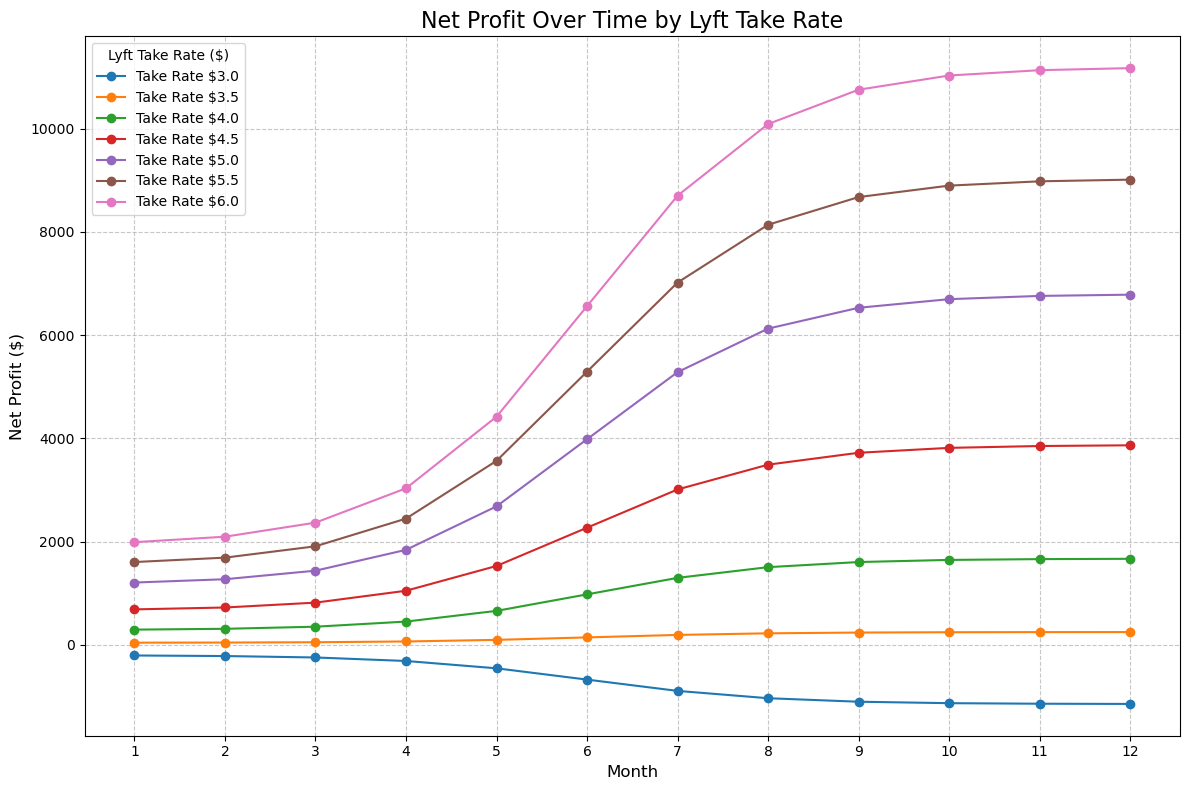

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate and calculate the mean Net Profit for each group
grouped_net_profit = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Profit ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_net_profit = grouped_net_profit.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Profit ($)')

# Plotting Net Profit over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_net_profit.columns:
    plt.plot(pivot_net_profit.index, pivot_net_profit[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Net Profit Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_net_profit.index)
plt.tight_layout()
plt.show()


In [31]:
# Save the finalized dataset to a new CSV file
final_csv_path = 'final_lyft_analysis_dataset.csv'  # Change the file name if needed
data.to_csv(final_csv_path, index=False)

print(f"Dataset saved as {final_csv_path}")


Dataset saved as final_lyft_analysis_dataset.csv


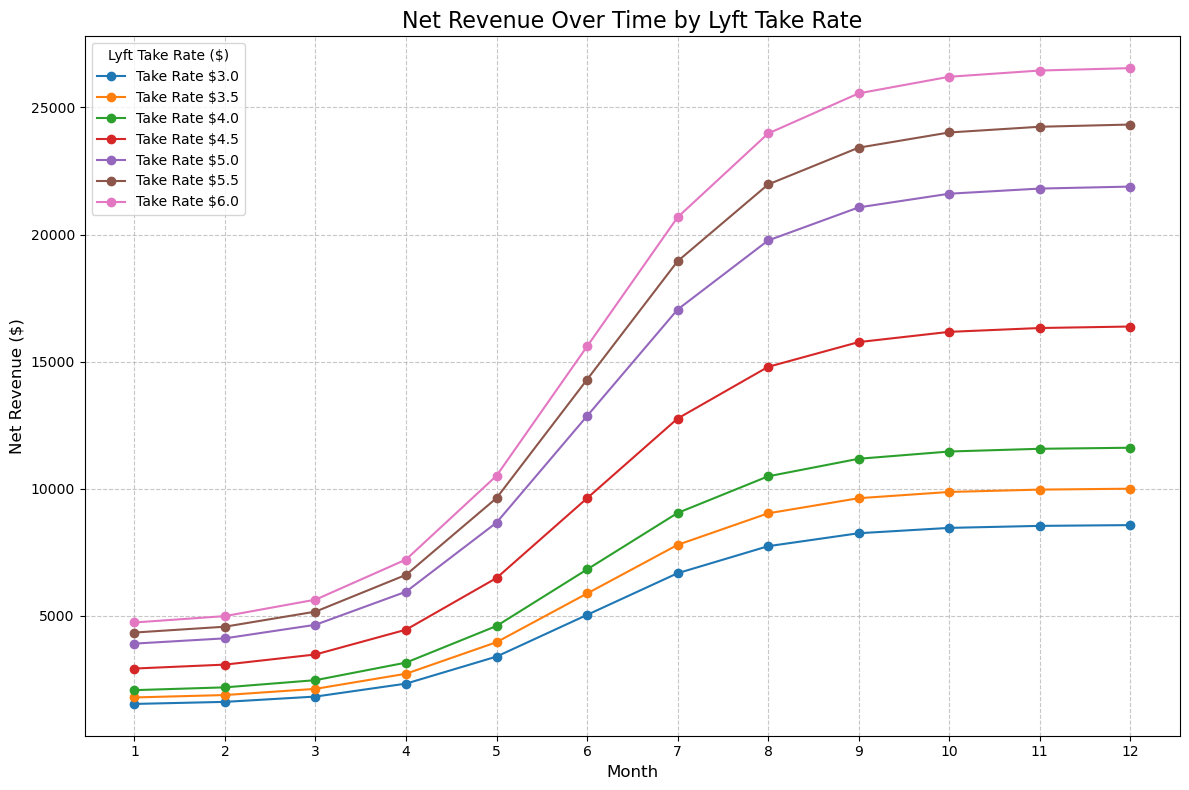

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate and calculate the mean Net Revenue for each group
grouped_net_revenue = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Revenue ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_net_revenue = grouped_net_revenue.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Revenue ($)')

# Plotting Net Revenue over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_net_revenue.columns:
    plt.plot(pivot_net_revenue.index, pivot_net_revenue[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Net Revenue Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Revenue ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_net_revenue.index)
plt.tight_layout()
plt.show()


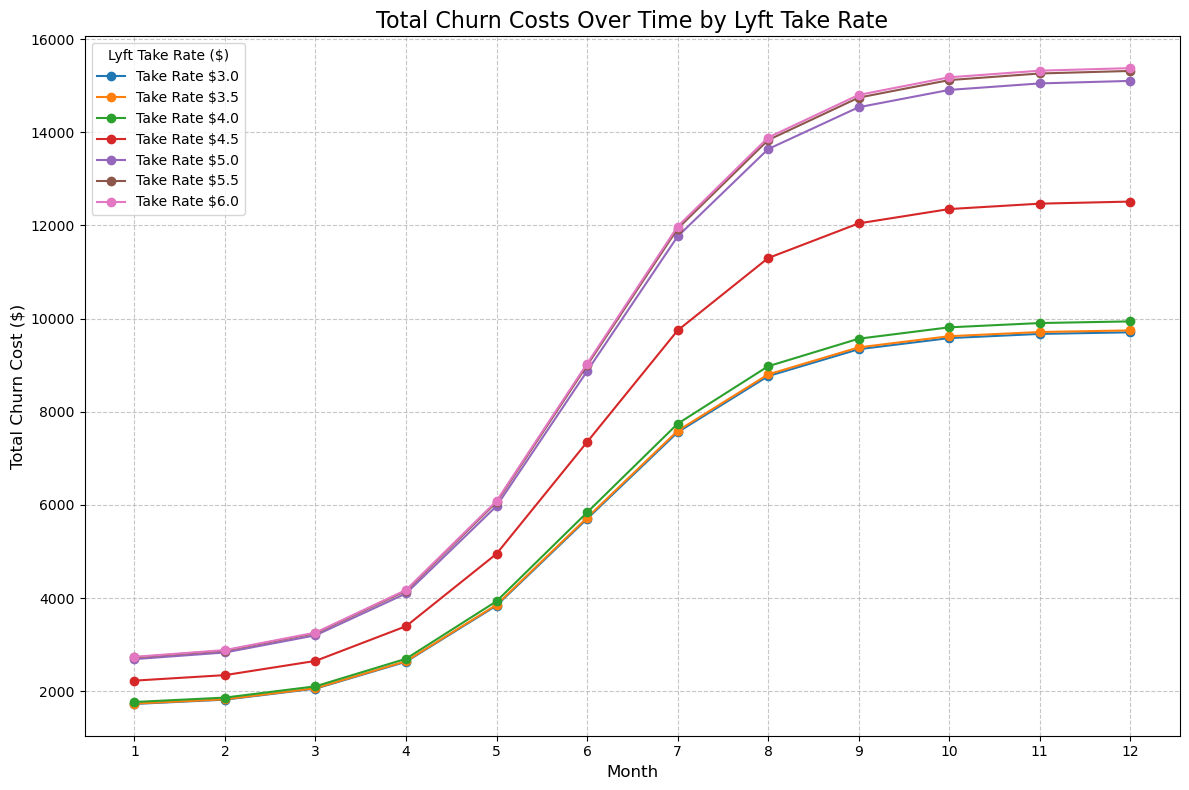

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate and calculate the mean Total Churn Cost for each group
grouped_churn_cost = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Total Churn Cost ($)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_churn_cost = grouped_churn_cost.pivot(index='Month', columns='Lyft Take Rate ($)', values='Total Churn Cost ($)')

# Plotting Total Churn Cost over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_churn_cost.columns:
    plt.plot(pivot_churn_cost.index, pivot_churn_cost[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Total Churn Costs Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Churn Cost ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_churn_cost.index)
plt.tight_layout()
plt.show()


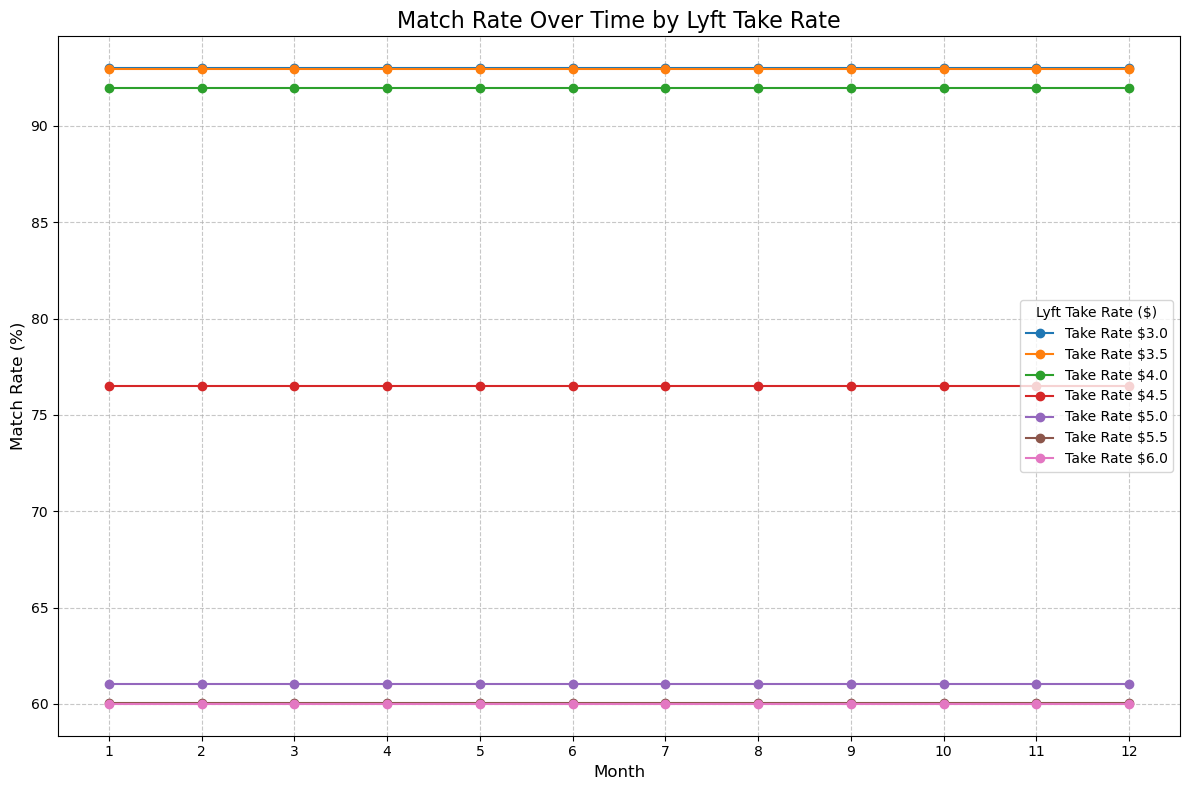

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate and calculate the mean Match Rate for each group
grouped_match_rate = data.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Match Rate (%)'].mean()

# Pivot data to get Lyft Take Rates as columns for easy plotting
pivot_match_rate = grouped_match_rate.pivot(index='Month', columns='Lyft Take Rate ($)', values='Match Rate (%)')

# Plotting Match Rate over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_match_rate.columns:
    plt.plot(pivot_match_rate.index, pivot_match_rate[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Match Rate Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Match Rate (%)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_match_rate.index)
plt.tight_layout()
plt.show()


# Looks good to me!